---

<center> <h1>📍📍 Exploratory Data Analysis by Allan on NYC taxi dataset 📍📍</h1> </center> 

---



##  📍 Building Basic predictive models over the NYC Taxi Trip dataset. 📍


### NYC Taxi Trip Dataset is provided. This dataset contains information about the taxi trips that took place in different parts of New York City and how much time did that trip take to complete.

#### Importing the required libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

#### Importing the required 

In [2]:
# loading dataset

df = pd.read_csv(r'C:\Users\allan\Desktop\Internshala EDA\Project\nyc_taxi_trip_duration.csv')

#### Dataset Description

#### Dataset Shape

In [3]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  729322
No. of columns:  11


In [4]:
# the first five rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# printing the last five rows
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


#### Missing values in the dataset

In [6]:
# checking for the missing values

print("No. of missing values in each columns: \n")
print(df.isnull().sum())

No. of missing values in each columns: 

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


#### Duplicate values in dataset

In [7]:
# checking for the duplicate records
print("No. of duplicate records: ", df.duplicated().sum())

No. of duplicate records:  0


#### Unique values in dataset

In [8]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

#### Datatype features in dataset

In [9]:
# checking the datatype of all features in the dataset

df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

#### Categorical variable

In [10]:
# checking the value count
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [11]:
# label_encoder object
label_encoder = LabelEncoder()

# Encode labels in column 'Discount'.
df['store_and_fwd_flag_encoded']= label_encoder.fit_transform(df['store_and_fwd_flag'])
df['store_and_fwd_flag_encoded']= label_encoder.fit_transform(df['store_and_fwd_flag'])

In [12]:
# checking the datatype of the datetime feature
print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     object
dropoff_datetime    object
dtype: object


In [13]:
# converting strings to datetime features

df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [14]:
# checking the datatype again

print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object


In [15]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())

Startdate:  2016-01-01 00:01:14
Enddate:  2016-06-30 23:59:37


#### Trip duration as per datetime feature

Text(0, 0.5, 'Total Number of pickups')

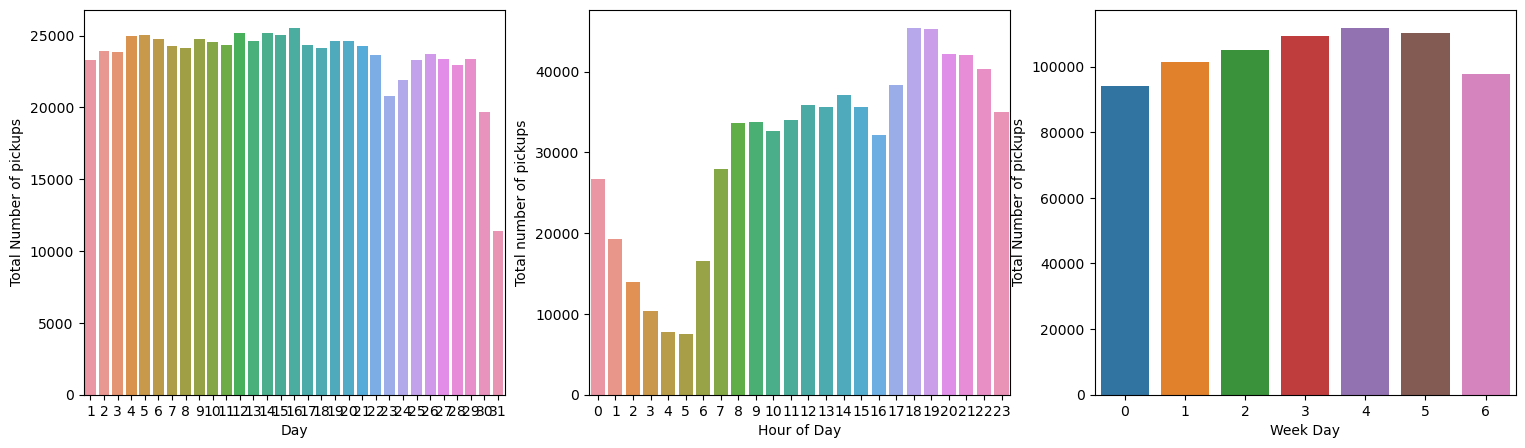

In [16]:
# extracting more features from the datetime variable

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday


# Datetime features
plt.figure(figsize=(25, 5))

# Passenger Count
plt.subplot(141)
sns.countplot(df['pickup_day'])
plt.xlabel('Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(142)
sns.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

# Passenger Count
plt.subplot(143)
sns.countplot(df['pickup_weekday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

#### Conclusion:

1. Weekdays have high trips compare to Sunday(0) and Saturday (6).

2. Trip is on peak on Thursday(4).

3. Trips are less in early morning before 7:00 , while more in the late evening hour at around 18:00 to 19:00 in the day.

4. first week and second week of the month have more trips

5. There are less trips at the end of the month.

#### Distance travelled using logitude and latitude columns.

In [17]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2


In [18]:
# Importing the library which lets us calculate distance from geographical coordinates
from geopy.distance import great_circle

In [19]:
def calculate_distance (pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    
    start_coords = (pickup_latitude, pickup_longitude)
    stop_coords = (dropoff_latitude, dropoff_longitude)
    
    return great_circle(start_coords, stop_coords).km

In [20]:
df['distance'] = df.apply(lambda x: calculate_distance(x['pickup_latitude'], 
                                                       x['pickup_longitude'],
                                                       x['dropoff_latitude'],
                                                       x['dropoff_longitude']), axis=1)

In [21]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,4.328540


In [22]:
df['distance'].value_counts()

0.000000    2901
0.000424      20
0.000424      19
0.000424      16
0.000424      11
            ... 
2.929161       1
0.977650       1
0.925223       1
4.112012       1
5.945846       1
Name: distance, Length: 726243, dtype: int64

#### Passenger count

Text(0, 0.5, 'Frequency')

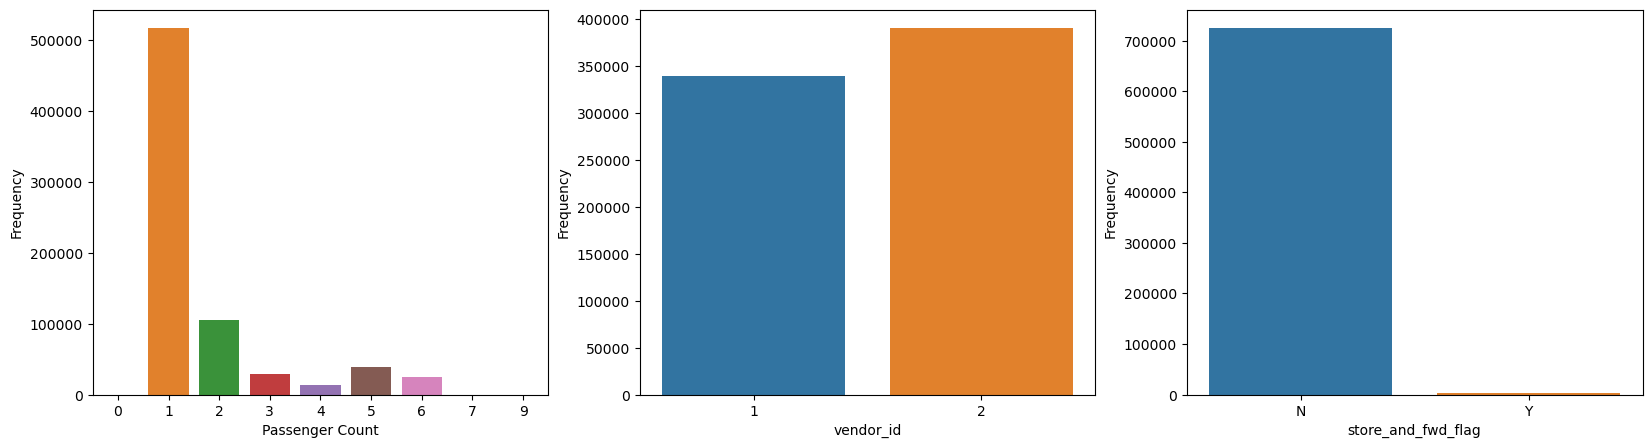

In [23]:
# Binary Features
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

# vendor_id
plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

#### Conclusion:

1. The majority of trips consist of single-passenger rides.
2. Vendor 2 has more trips, than to vendor 1
3. The value with Y is very low in the store_and_fwd_flag variable. This suggests that almost no storing took place

In [24]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

#### Removing The Outliers

From the graph and the data above, we can see there are extremely low values with passenger_count 0, 7 and 9. So, we will remove these records

In [25]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [26]:
# checking the passenger_count value distribution again

df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [27]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,4.328540


In [28]:
# trip duration in hours
df['trip_duration_in_hour'] = df['trip_duration'].apply(lambda x : x/3600)

In [29]:
# removing outliers considering trips are not supposed to exceed a day(24 hours)
df = df[df['trip_duration_in_hour']<=24]

In [30]:
df['trip_duration_in_hour'].min(), df['trip_duration_in_hour'].max()

(0.0002777777777777778, 23.9975)

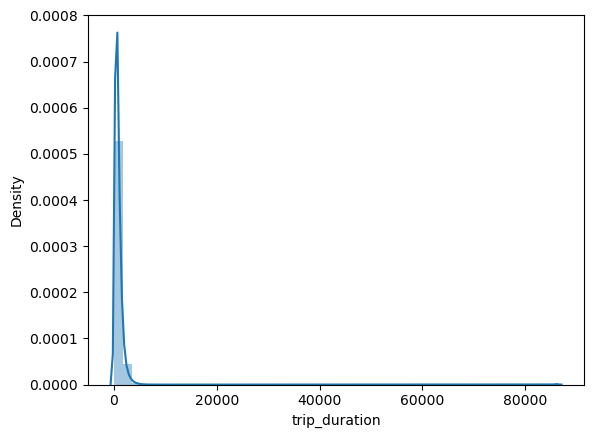

In [31]:
# before log transform
sns.distplot(df['trip_duration'])
plt.show()

#### High skewness is found, so we will normailze the trip_duration column using log function

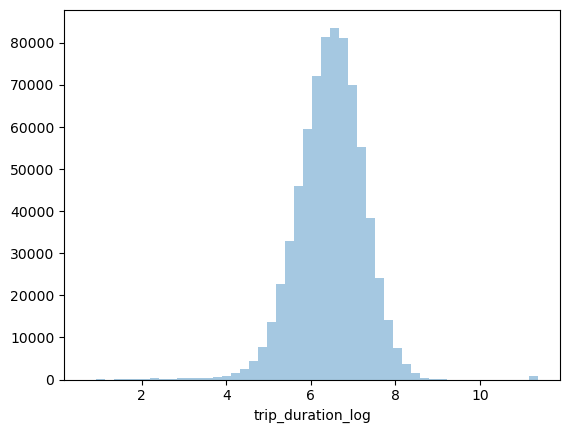

In [32]:
# after log transform of trip duration in seconds

df['trip_duration_log'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['trip_duration_log'], kde = False)
plt.show()

#### Conclusion :

Most of the trips are of 6 hours

In [33]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,distance,trip_duration_in_hour,trip_duration_log
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,1.199074,0.111111,5.993961
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,4.129117,0.305556,7.003974
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,7.250763,0.454167,7.400010
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,2.361101,0.316944,7.040536
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,4.328540,0.235556,6.744059


In [34]:
df1 = df.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',	'pickup_latitude',	
                       'dropoff_longitude',	'dropoff_latitude',	'store_and_fwd_flag',	'trip_duration', 
                       'trip_duration_in_hour'])

In [35]:
df1.head()

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,distance,trip_duration_log
0,2,1,0,29,16,0,1.199074,5.993961
1,1,2,0,11,23,4,4.129117,7.003974
2,2,2,0,21,17,6,7.250763,7.400010
3,2,6,0,5,9,1,2.361101,7.040536
4,1,1,0,17,6,2,4.328540,6.744059


In [36]:
X = df1.drop('trip_duration_log', axis=1)
y = df1['trip_duration_log']

#### Scaling the Data (Using MinMax Scaler)

In [37]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

X = pd.DataFrame(x_scaled, columns=X.columns)

## Solving the problem statement

### 1. Choose the most suitable evaluation metric and state why you chose it. 

#### Root Mean Squared Error (RMSE)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 2.Creating train and test set for benchmark model.

In [39]:
# creating train and test set for benchmark model

benchmark_train = pd.concat([X_train, y_train], axis=1, join="inner")
benchmark_test = pd.concat([X_test, y_test], axis=1, join="inner")

In [40]:
benchmark_train.head()

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,distance,trip_duration_log
377868,0.0,0.0,0.0,0.333333,0.260870,0.000000,0.000696,5.697093
71049,1.0,0.2,0.0,0.133333,0.391304,0.833333,0.001610,6.786717
189296,1.0,0.0,0.0,0.633333,0.434783,0.333333,0.003725,7.856707
489482,1.0,0.8,0.0,0.600000,0.478261,0.166667,0.001332,5.446737
663553,1.0,0.0,0.0,0.366667,0.173913,1.000000,0.001484,6.224558


In [41]:
benchmark_test.head()

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,distance,trip_duration_log
76711,0.0,0.0,0.0,0.566667,0.869565,0.000000,0.003029,8.104401
293155,0.0,0.2,0.0,0.533333,0.739130,1.000000,0.001234,6.774224
223830,1.0,0.0,0.0,0.366667,1.000000,0.666667,0.001090,5.068904
145976,1.0,0.0,0.0,0.633333,0.565217,1.000000,0.001258,7.502738
128271,1.0,0.0,0.0,0.566667,0.956522,0.666667,0.002205,5.616771


In [42]:
# the predicted value here is substituted with the mean of target"

benchmark_test['simple_mean'] = benchmark_train['trip_duration_log'].mean()

In [43]:
# error in simple mean model

error = sqrt(mean_squared_error(benchmark_test['trip_duration_log'], benchmark_test['simple_mean']))

print("r-squared score of simple mean model: ", error)

r-squared score of simple mean model:  0.7978477147493098


### 3.Build a K-Nearest neighbours model for the given dataset and find the best value of K.

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [46]:
y_pred = knnr.predict(X_test)

error = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", error)

RMSE of knn model:  0.574244551240203


#### Plotting Elbow curve to determine the best value of k.

In [47]:
def elbow(k):
  test = []

  for i in k:
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train, y_train)

    tmp_pred = reg.predict(X_test)
    temp_error = sqrt(mean_squared_error(tmp_pred, y_test))
    test.append(temp_error)

  return test

In [48]:
k = range(1, 10)

In [49]:
test = elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

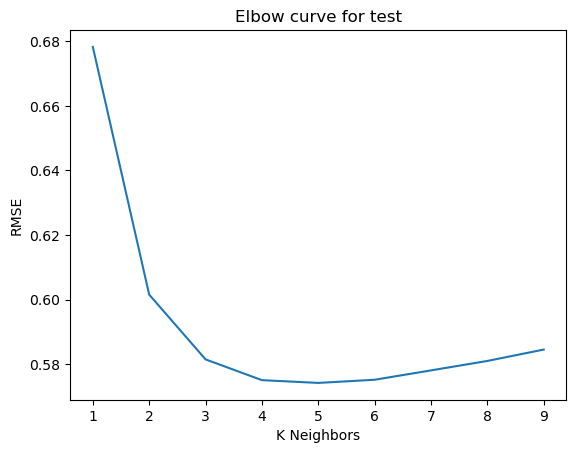

In [50]:
# plotting the curve

plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('RMSE')
plt.title('Elbow curve for test')

So, the lowest error occurs when k = 4

In [51]:
# re-checking the error after changing n_neighbors to 4

knnr = KNeighborsRegressor(n_neighbors=4)
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

#### Test-Score of RMSE KNN Model

In [52]:
y_pred = knnr.predict(X_test)

knn_test_rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", knn_test_rmse)

RMSE of knn model:  0.5751031451679013


#### Train-Score of RMSE KNN Model.

In [53]:
y_pred = knnr.predict(X_train)

knn_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of knn model: ", knn_train_rmse)

RMSE of knn model:  0.43584344544972553


### 4.Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Test-Score of RMSE Linear Regression Model

In [55]:
y_pred = lr.predict(X_test)

lm_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of linear regressor model: ", lm_test_rmse)

RMSE of linear regressor model:  0.6342994704592625


#### Train-Score of RMSE Linear Regression Model

In [56]:
y_pred = lr.predict(X_train)

lm_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of linear regressor model: ", lm_train_rmse)

RMSE of linear regressor model:  0.6595950802067715


### 5.Build a Decision tree model for the given dataset. Attempt to interpret the variable importance.

In [57]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### Test-Score of RMSE Decision Tree Regressor Model

In [58]:
y_pred = dtr.predict(X_test)

dtr_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of decision tree regressor model: ", dtr_test_rmse)

RMSE of decision tree regressor model:  0.6731129092125767


#### Train-Score of RMSE Decision Tree Regressor Model

In [59]:
y_pred = dtr.predict(X_train)

dtr_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of decision tree regressor model: ", dtr_train_rmse)

RMSE of decision tree regressor model:  0.03514648135084737


##### Model         -   K-Nearest Neighbors
##### Train score   -   0.435
##### Test score    -   0.575

##### Model         -   Linear Regressor
##### Train score   -   0.659
##### Test score    -   0.634
   
   
##### Model        -   Decision Tree Regressor
##### Train score   -   0.035
##### Test score    -   0.673
 

#### 6.Plot the following Bar plots: 

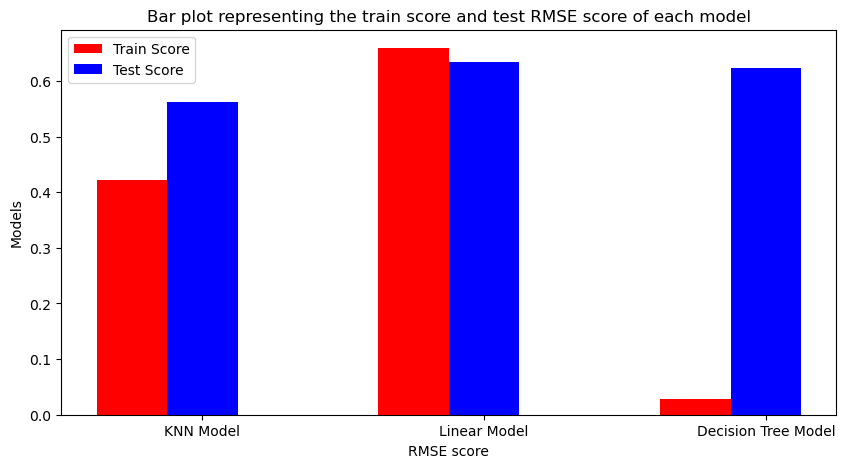

In [60]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 5])

train_scores = [0.422, 0.659, 0.029]
test_scores = [0.562, 0.634, 0.623]

# Passing the parameters to the bar function
# Using X now to align the bars side by side
X = np.arange(len(train_scores))


# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, train_scores, color = 'r', width = 0.25)
plt.bar(X + 0.25, test_scores, color = 'b', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Train Score', 'Test Score'])

labels = ['KNN Model', 'Linear Model', 'Decision Tree Model']

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(3)], labels)

# Giving the tilte for the plot
plt.title("Bar plot representing the train score and test RMSE score of each model")
# Namimg the x and y axis
plt.xlabel('RMSE score')
plt.ylabel('Models')


# Displaying the bar plot
plt.show()